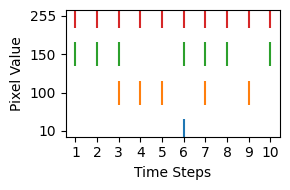

In [52]:
import torch
import matplotlib.pyplot as plt

# Step 1: Normalize the input vector to the range [0, 1]
input_vector = torch.tensor([10, 100, 150, 255], dtype=torch.float32)
normalized_vector = input_vector / 255

# Step 2: Generate spike trains using rate encoding
def rate_encoding(input_signal, num_steps):
    spike_train = torch.bernoulli(input_signal.repeat(num_steps, 1))
    return spike_train

def latency_coding(input_signal, num_steps):
    """
    Encodes an input signal into a spike train using latency coding.

    Parameters:
    - input_signal: A tensor representing the input values (range 0-1).
    - num_steps: Number of time steps over which to encode the spikes.

    Returns:
    - spike_train: A binary tensor representing the spike train.
    """
    spike_train = torch.zeros(num_steps, len(input_signal))
    
    for i, val in enumerate(input_signal):
        # The higher the input value, the earlier the spike
        spike_time = int((1 - val) * (num_steps - 1))
        spike_train[spike_time, i] = 1  # Spike occurs at calculated time
    
    return spike_train

num_steps = 10  # Number of time steps for the spike train
spike_train = rate_encoding(normalized_vector, num_steps)
#spike_train = latency_coding(normalized_vector, num_steps)

# Step 3: Visualize the spike trains
def plot_spike_train(spike_train, input_vector):
    plt.figure(figsize=(3, 2))
    for neuron_idx, spikes in enumerate(spike_train.T):
        spike_times = torch.where(spikes == 1)[0]
        plt.scatter(spike_times+1, [neuron_idx] * len(spike_times), marker='|', s=300, label=f'Input: {int(input_vector[neuron_idx].item())}')

    plt.xticks(range(1, num_steps+1))
    plt.yticks(range(len(input_vector)), [f'{int(v)}' for v in input_vector])
    plt.xlabel('Time Steps')
    plt.ylabel('Pixel Value')
    #plt.title('Spike Train Visualization using Rate Encoding')
    #plt.legend()
    plt.tight_layout()
    plt.savefig('Rate_Encoding_Example.png')
    plt.show()

# Plot the spike train
plot_spike_train(spike_train, input_vector)